Libraries

In [32]:
pip install keras-tuner

In [33]:
from tensorflow import keras
from keras import layers
from kerastuner.tuners import RandomSearch
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error, accuracy_score
import math

Getting dataset

In [34]:
df= pd.read_csv('/content/S&P dataset.csv')
# df.head()

In [35]:
df["Date"] = pd.to_datetime(df["Date"])

In [36]:
df = df.set_index("Date")
# print(df.shape)
# print(df.columns)

Data Visualization

Text(0.5, 1.0, 'S&P Cumulative Returns')

<Figure size 2000x2000 with 0 Axes>

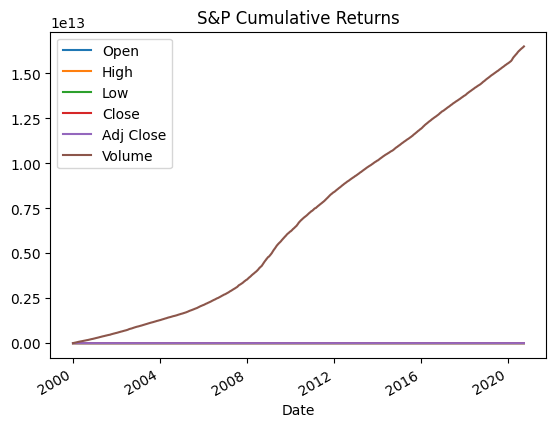

In [37]:
# df.head()
plt.figure(figsize=(20,20))
dr = df.cumsum()
dr.plot()
plt.savefig("Cumm_return.png")
plt.title('S&P Cumulative Returns')

<Axes: xlabel='Date'>

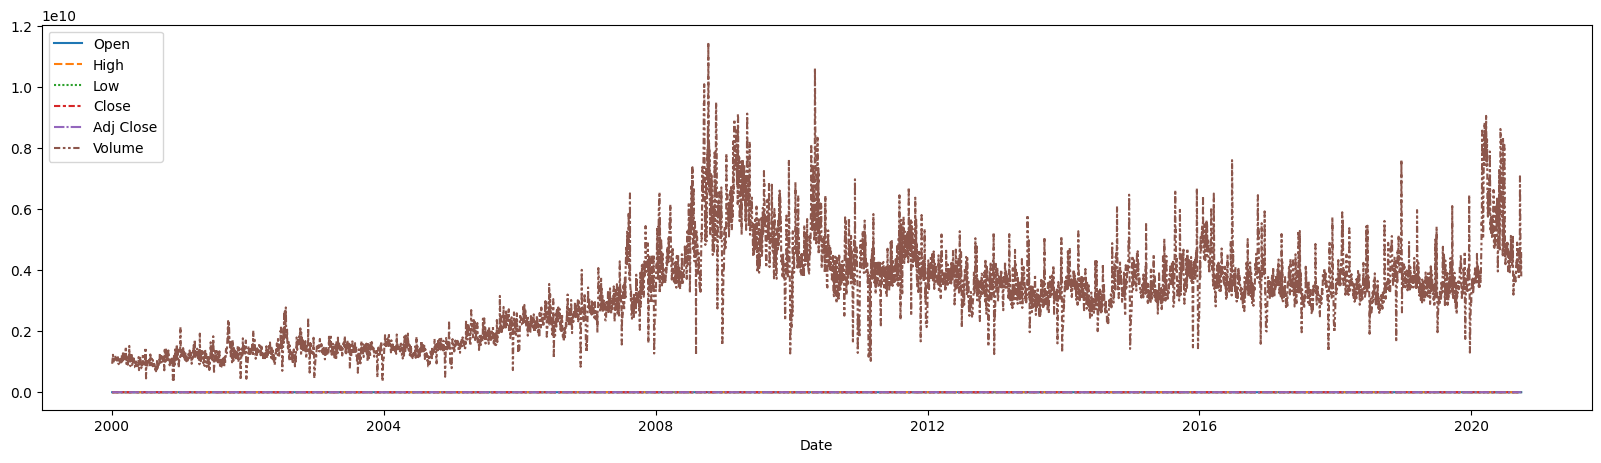

In [38]:
plt.figure(figsize = (20,5))
plt.savefig("trend.png")
sns.lineplot(data=df,)

Preprocessing data


In [39]:
scaler = MinMaxScaler(feature_range = (0,1))
df = scaler.fit_transform(df)

In [40]:
train = df[0:3000]
test = df[3500:]
# print(test.shape)
# print(train.shape)

In [41]:
def create_dataset(dataset, time_stamp):
  X,Y = [],[]
  for i in range(len(dataset)-time_stamp-1):
    a = dataset[i:(i+time_stamp), 0]
    X.append(a)
    Y.append(df[i+time_stamp, 0])
  return np.array(X), np.array(Y)

In [42]:
time_stamp = 100
X_train, Y_train = create_dataset(train, time_stamp)
X_test, Y_test = create_dataset(test, time_stamp)

In [43]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

The model: LSTM

In [44]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape = (100,1)))
model.add(LSTM(100, return_sequences = True))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 100)          40800     
                                                                 
 lstm_4 (LSTM)               (None, 100, 100)          80400     
                                                                 
 lstm_5 (LSTM)               (None, 50)                30200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 151451 (591.61 KB)
Trainable params: 151451 (591.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
history = model.fit(X_train, Y_train, validation_split = 0.1, shuffle = False, epochs = 50, batch_size = 16, verbose = 1)

Epoch 1/50
164/164 [==============================] - 9s 26ms/step - loss: 0.0019 - val_loss: 3.5132e-04
Epoch 2/50
164/164 [==============================] - 4s 26ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 3/50
164/164 [==============================] - 5s 30ms/step - loss: 0.0017 - val_loss: 7.9698e-04
Epoch 4/50
164/164 [==============================] - 5s 33ms/step - loss: 0.0017 - val_loss: 0.0035
Epoch 5/50
164/164 [==============================] - 5s 30ms/step - loss: 0.0021 - val_loss: 0.0047
Epoch 6/50
164/164 [==============================] - 5s 32ms/step - loss: 0.0024 - val_loss: 0.0069
Epoch 7/50
164/164 [==============================] - 5s 28ms/step - loss: 0.0030 - val_loss: 0.0067
Epoch 8/50
164/164 [==============================] - 3s 16ms/step - loss: 0.0031 - val_loss: 0.0055
Epoch 9/50
164/164 [==============================] - 3s 16ms/step - loss: 0.0026 - val_loss: 0.0052
Epoch 10/50
164/164 [==============================] - 3s 18ms/step - loss: 0.0026 

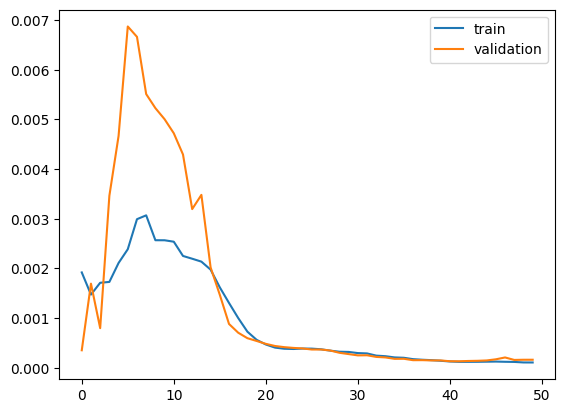

In [47]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'validation')
plt.legend()
plt.savefig('loss.png')
plt.show()

In [64]:
Y_pred = model.predict(X_test)
train_predict=model.predict(X_train)
print(math.sqrt(mean_squared_error(Y_test,Y_pred)))

91/91 [==============================] - 0s 5ms/step
0.1808083601013009


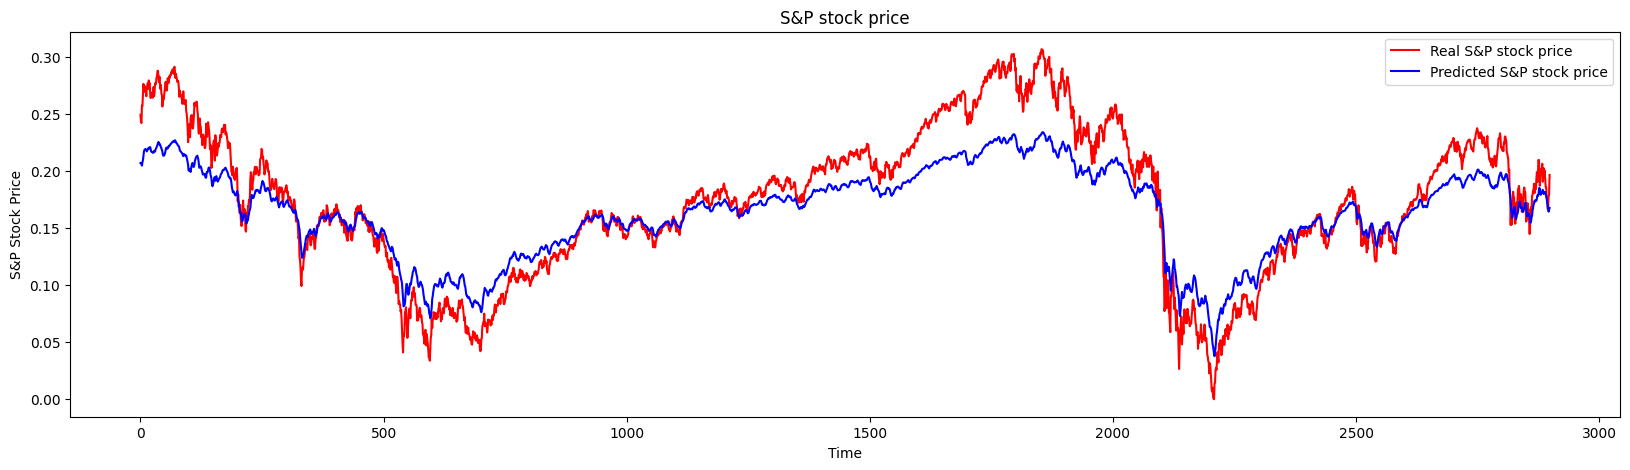

In [66]:
plt.figure(figsize=(20,5))
plt.plot(Y_train, color = 'red', label = 'Real S&P stock price')
plt.plot(train_predict, color = 'blue', label = 'Predicted S&P stock price')
plt.title('S&P stock price')
plt.xlabel('Time')
plt.ylabel('S&P Stock Price')
plt.legend()
plt.savefig("results_LSTM.png")
plt.show()

GRU

In [50]:
model = Sequential()
model.add(keras.layers.GRU(100, return_sequences = True, input_shape = (100,1)))
model.add(keras.layers.GRU(50, return_sequences = False))
model.add(Dense(1))
model.compile(loss = "mean_squared_error", optimizer = 'adam')

In [51]:
history=model.fit(
    X_train,Y_train,
    validation_split=0.1,
    shuffle=False,
    epochs=50,batch_size=16,verbose=1)

Epoch 1/50
164/164 [==============================] - 8s 16ms/step - loss: 0.0025 - val_loss: 2.2182e-04
Epoch 2/50
164/164 [==============================] - 2s 11ms/step - loss: 9.7535e-04 - val_loss: 2.4214e-04
Epoch 3/50
164/164 [==============================] - 2s 14ms/step - loss: 0.0011 - val_loss: 2.8722e-04
Epoch 4/50
164/164 [==============================] - 2s 14ms/step - loss: 0.0013 - val_loss: 6.6965e-04
Epoch 5/50
164/164 [==============================] - 2s 12ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 6/50
164/164 [==============================] - 2s 12ms/step - loss: 0.0016 - val_loss: 6.3664e-04
Epoch 7/50
164/164 [==============================] - 2s 11ms/step - loss: 0.0016 - val_loss: 0.0029
Epoch 8/50
164/164 [==============================] - 2s 11ms/step - loss: 0.0018 - val_loss: 0.0050
Epoch 9/50
164/164 [==============================] - 2s 13ms/step - loss: 0.0021 - val_loss: 0.0052
Epoch 10/50
164/164 [==============================] - 2s 14ms/step

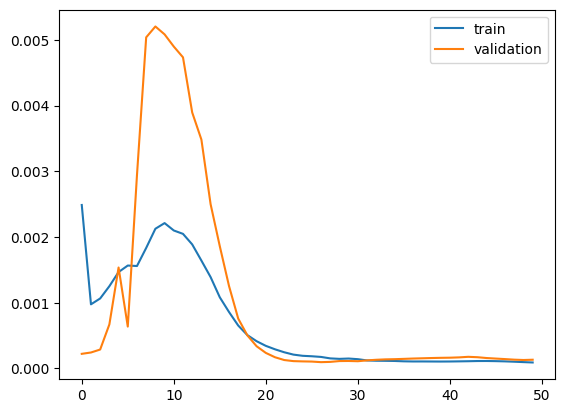

In [52]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.savefig("loss_GRU.png")
plt.legend()

In [62]:
Y_pred = model.predict(X_test)
train_predict=model.predict(X_train)
math.sqrt(mean_squared_error(Y_test, Y_pred))

91/91 [==============================] - 0s 5ms/step


0.1808083601013009

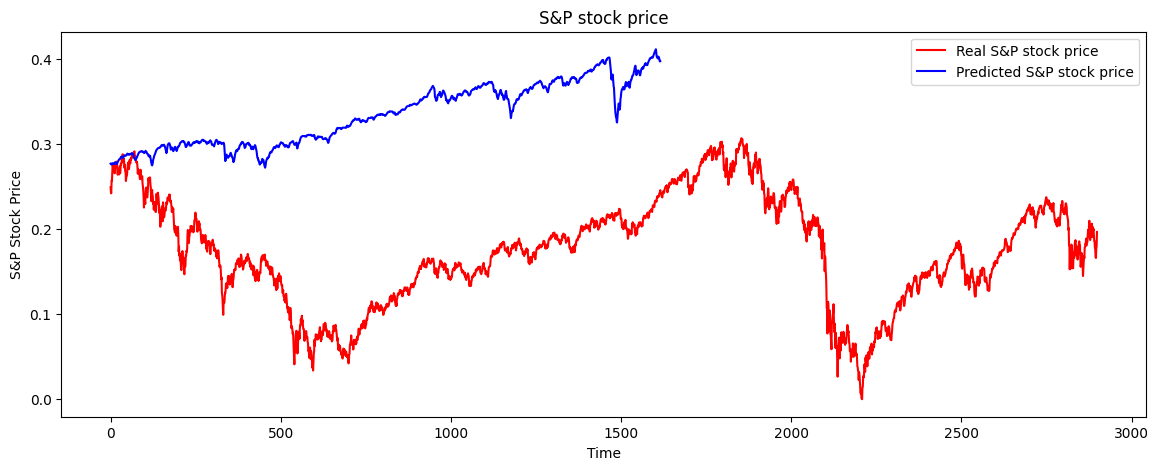

In [63]:
plt.figure(figsize=(14,5))
plt.plot(Y_train, color = 'red', label = 'Real S&P stock price')
plt.plot(Y_pred, color = 'blue', label = 'Predicted S&P stock price')
plt.title('S&P stock price')
plt.xlabel('Time')
plt.ylabel('S&P Stock Price')
plt.legend()
plt.savefig('GRU_RESULt.png')
plt.show()

GRU and LSTM

In [55]:
model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(100,1)))
model.add(layer = keras.layers.Dropout(.2,))
model.add(keras.layers.GRU(50,return_sequences=False))
model.add(keras.layers.Dropout(.2,))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer = keras.optimizers.Adam(learning_rate=0.001))

In [56]:
history=model.fit(
    X_train,Y_train,
    validation_split=0.1,
    shuffle=False,
    epochs=20,batch_size=16,verbose=1,)

Epoch 1/20
164/164 [==============================] - 7s 17ms/step - loss: 0.0028 - val_loss: 2.3219e-04
Epoch 2/20
164/164 [==============================] - 2s 14ms/step - loss: 0.0011 - val_loss: 2.4674e-04
Epoch 3/20
164/164 [==============================] - 3s 19ms/step - loss: 0.0013 - val_loss: 3.3731e-04
Epoch 4/20
164/164 [==============================] - 2s 12ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 5/20
164/164 [==============================] - 2s 12ms/step - loss: 0.0017 - val_loss: 0.0028
Epoch 6/20
164/164 [==============================] - 3s 18ms/step - loss: 0.0019 - val_loss: 0.0041
Epoch 7/20
164/164 [==============================] - 3s 16ms/step - loss: 0.0022 - val_loss: 0.0055
Epoch 8/20
164/164 [==============================] - 4s 22ms/step - loss: 0.0023 - val_loss: 0.0054
Epoch 9/20
164/164 [==============================] - 3s 18ms/step - loss: 0.0024 - val_loss: 0.0052
Epoch 10/20
164/164 [==============================] - 2s 12ms/step - loss: 0.0

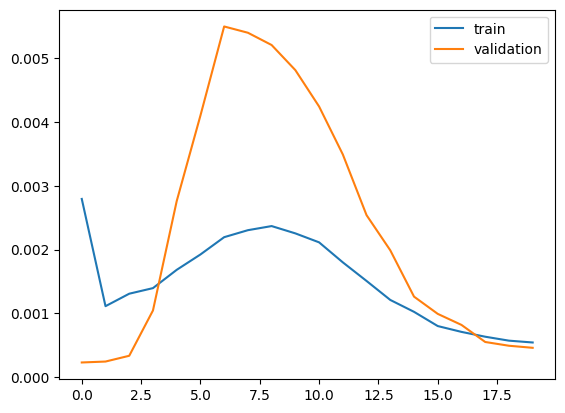

In [57]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.savefig("GRU_LSTM_loss.png")
plt.legend()

In [60]:
Y_pred = model.predict(X_test)
train_predict=model.predict(X_train)
math.sqrt(mean_squared_error(Y_test,Y_pred))

91/91 [==============================] - 0s 5ms/step


0.1808083601013009

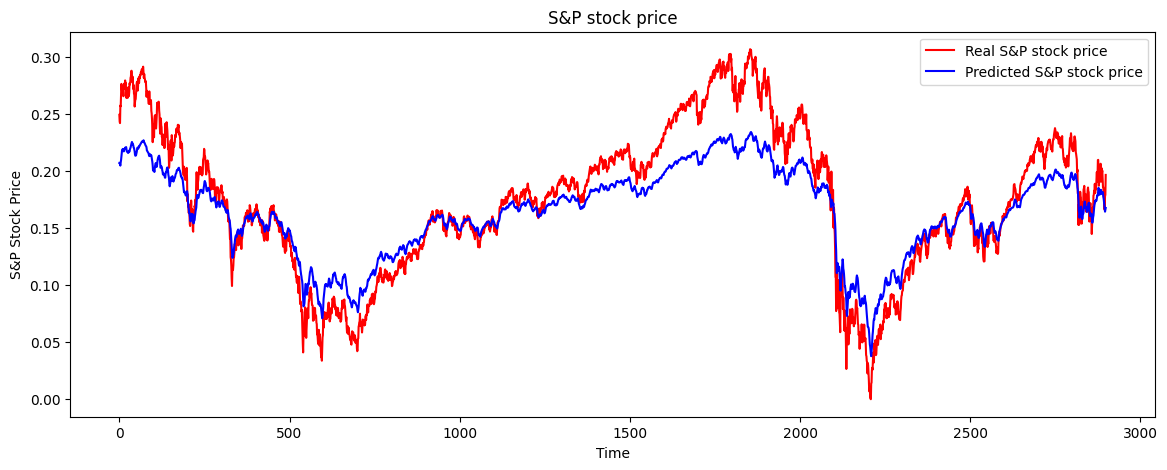

In [67]:
plt.figure(figsize=(14,5))
plt.plot(Y_train, color = 'red', label = 'Real S&P stock price')
plt.plot(train_predict, color = 'blue', label = 'Predicted S&P stock price')
plt.title('S&P stock price')
plt.xlabel('Time')
plt.ylabel('S&P Stock Price')
plt.legend()
plt.savefig("LSTM_GRU_result.png")
plt.show()